In [ ]:
# Problem 1

In [ ]:
#a

In [51]:
import pandas as pd
df = pd.read_csv("data/incomes.txt", names = ['Income'])
df.describe()

,Income
count,200.000000
mean,87588.930769
std,18081.166388
min,49278.801938
25%,74088.607447
50%,85801.697366
75%,100102.725206
max,135865.026796


Text(0,0.5,'Percentage of Income')

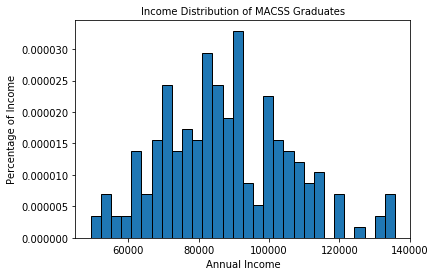

In [55]:
import matplotlib.pyplot as plt
bins = 30
plt.hist(df['Income'], bins, normed = True, edgecolor = 'k')
plt.title('Income Distribution of MACSS Graduates', fontsize = 10)
plt.xlabel('Annual Income')
plt.ylabel('Percentage of Income')

In [ ]:
#b

In [19]:
import scipy.stats as sts
import numpy as np
def trunc_norm_pdf(xvals, mu, sigma, cut_lb, cut_ub):
    if cut_ub == 'None' and cut_lb == 'None':
        prob_notcut = 1.0
    elif cut_ub == 'None' and cut_lb != 'None':
        prob_notcut = 1.0 - sts.lognorm.cdf(cut_lb, sigma, scale=np.exp(mu))
    elif cut_ub != 'None' and cut_lb == 'None':
        prob_notcut = sts.lognorm.cdf(cut_ub, sigma, scale=np.exp(mu))
    elif cut_ub != 'None' and cut_lb != 'None':
        prob_notcut = (sts.lognorm.cdf(cut_ub, sigma, scale=np.exp(mu)) -
                       sts.lognorm.cdf(cut_lb, sigma, scale=np.exp(mu)))
            
    pdf_vals    = ((1/(xvals * sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (np.log(xvals) - mu) ** 2 / (2 * sigma ** 2))) /
                    prob_notcut)
    
    return pdf_vals

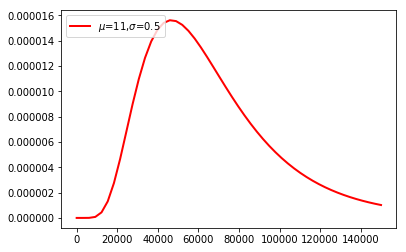

In [38]:
dist_pts = np.linspace(1, 150000)
mu_1 = 11.0
sig_1 = 0.5
plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_1, sig_1, 0, 150000),
         linewidth=2, color='r', label='$\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper left')

In [22]:
def log_lik_truncnorm(xvals, mu, sigma, cut_lb, cut_ub):
    pdf_vals = trunc_norm_pdf(xvals, mu, sigma, cut_lb, cut_ub)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

print('Log-likelihood: ', log_lik_truncnorm(df['Income'], mu_1, sig_1, 0, 150000))

Log-likelihood:  -2379.120591931827


In [ ]:
#c

In [23]:
def crit(params, *args):
    mu, sigma = params
    xvals, cut_lb, cut_ub = args
    log_lik_val = log_lik_truncnorm(xvals, mu, abs(sigma), cut_lb, cut_ub)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [25]:
import scipy.optimize as opt

mu_init = 11
sig_init = 0.5
params_init = np.array([mu_init, sig_init])
mle_args = (df['Income'], 0, 150000)
results_uncstr = opt.minimize(crit, params_init, args=(mle_args))
mu_MLE, sig_MLE = results_uncstr.x
print('mu_MLE =', mu_MLE, ' sig_MLE =', sig_MLE)
print("Maximum Log Likelihood =", log_lik_truncnorm(df['Income'], mu_MLE, sig_MLE, 0, 150000))

mu_MLE = 11.361699965967007  sig_MLE = 0.21174326386681536
Maximize Log Likelihood = -2240.934337511636


(0, 150000)

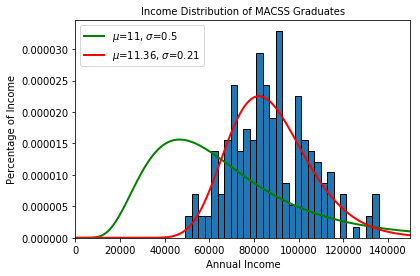

In [28]:
plt.hist(df['Income'], bins, normed = True, edgecolor = 'k')

plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_1, sig_1, 0, 150000), 
         linewidth = 2, color = 'g', label = '$\mu$=11, $\sigma$=0.5')
plt.legend(loc = 'upper left')

plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_MLE, sig_MLE, 0, 150000), 
         linewidth = 2, color = 'r', label = '$\mu$=11.36, $\sigma$=0.21')
plt.legend(loc = 'upper left')

plt.title('Income Distribution of MACSS Graduates', fontsize = 10)
plt.xlabel('Annual Income')
plt.ylabel('Percentage of Income')
plt.xlim([0, 150000])

In [43]:
vcv_mle = results_uncstr.hess_inv

stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])
print('VCV(MLE) = ', vcv_mle)
print('Standard error for mu estimate = ', stderr_mu_mle)
print('Standard error for sigma estimate = ', stderr_sig_mle)
print('mu percent', stderr_mu_mle/mu_MLE)
print('sig percent', stderr_sig_mle/sig_MLE)

VCV(MLE) =  [[ 2.05516896e-04 -1.58272274e-05]
 [-1.58272274e-05  9.92889787e-05]]
Standard error for mu estimate =  0.014335860496126812
Standard error for sigma estimate =  0.009964385515514781
mu percent 0.001261770733170973
sig percent 0.0470588076028822


In [ ]:
#d

In [30]:
log_lik_h0 = log_lik_truncnorm(df['Income'], mu_1, sig_1, 0, 150000)
print('hypothesis value log likelihood', log_lik_h0)
log_lik_mle = log_lik_truncnorm(df['Income'], mu_MLE, sig_MLE, 0, 150000)
print('MLE log likelihood', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

hypothesis value log likelihood -2379.120591931827
MLE log likelihood -2240.934337511636
likelihood ratio value 276.3725088403826
chi squared of H0 with 2 degrees of freedom p-value =  0.0


In [31]:
print('We should reject the null hypothesis because p-value is very small.')

We should reject the null hypothesis because p-value is very small.


In [ ]:
#e

In [33]:
p1 = 1-sts.lognorm.cdf(100000, sig_MLE, scale=np.exp(mu_MLE))
print('The probability of earning more than $100,000 is ', p1)

The probability of earning more than $100,000 is  0.23755400684543593


In [34]:
p2 = sts.lognorm.cdf(75000, sig_MLE, scale=np.exp(mu_MLE))
print('The probability of earning less than $75,000 is ', p2)

The probability of earning less than $75,000 is  0.2596439369860366


In [ ]:
# Problem 2

In [ ]:
#a

In [57]:
df = pd.read_csv("data/sick.txt").astype('float64')
df.describe()

,sick,age,children,avgtemp_winter
count,200.000000,200.000000,200.000000,200.000000
mean,1.008600,40.683850,1.674950,44.041250
std,0.504222,11.268686,0.969761,11.101977
min,0.040000,12.810000,0.000000,16.500000
25%,0.650000,33.967500,0.970000,36.112500
50%,0.960000,41.015000,1.560000,43.300000
75%,1.322500,47.750000,2.322500,52.172500
max,2.800000,74.890000,4.960000,68.600000


In [67]:
def log_lik_normal(y, b0, b1, b2, b3, x1, x2, x3, sigma):
    error = y - b0 - b1 * x1 - b2 * x2 - b3 * x3
    sigma = abs(sigma)
    pdf_values = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(error) ** 2 / (2 * sigma ** 2)) 
    log_pdf_value = np.log(pdf_values)
    log_lik_value = log_pdf_value.sum()
    return log_lik_value

In [68]:
def crit2(params, *args):
    b0, b1, b2, b3, sigma = params
    y, x1, x2, x3 = args
    log_lik_val = log_lik_normal(y, b0, b1, b2, b3, x1, x2, x3, sigma)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [71]:
import scipy.optimize as opt
b0_i, b1_i, b2_i, b3_i, sig_i = (0,0,0,0,0.5)
y=df['sick']
x1, x2, x3 = df['age'], df['children'], df['avgtemp_winter']
params_init = np.array([b0_i, b1_i, b2_i, b3_i, sig_i])
results = opt.minimize(crit2, params_init,(y, x1, x2, x3))
b0_MLE = results.x[0]
b1_MLE = results.x[1]
b2_MLE = results.x[2]
b3_MLE = results.x[3]
sig_MLE = results.x[4]
print('beta 0=', b0_MLE)
print('beta 1=', b1_MLE)
print('beta 2=', b2_MLE)
print('beta 3=', b3_MLE)
print('sigma=', sig_MLE)
print("Value of the log likelihood function is",-results.fun)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:643: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:643: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Us

beta 0= 0.2516463835883786
beta 1= 0.012933350042074635
beta 2= 0.40050204833336356
beta 3= -0.00999167303390712
sigma= 0.0030176821760574952
Value of the log likelihood function is 876.8650462886835


In [72]:
vcv_mle = results.hess_inv
print('VCV(MLE) = ', vcv_mle)

VCV(MLE) =  [[ 5.33696389e-07 -3.22691329e-08  3.01610380e-07  8.25275679e-09
   3.22376633e-08]
 [-3.22691329e-08  2.48832826e-09 -1.87360905e-08 -9.56493033e-10
  -1.79190704e-09]
 [ 3.01610380e-07 -1.87360905e-08  1.75149148e-07  4.92967898e-09
   1.86031934e-08]
 [ 8.25275679e-09 -9.56493033e-10  4.92967898e-09  5.47000117e-10
   4.04497374e-10]
 [ 3.22376633e-08 -1.79190704e-09  1.86031934e-08  4.04497374e-10
   2.54440972e-08]]


In [ ]:
#b

In [74]:
b0_new, b1_new, b2_new, b3_new, sigma_new = 1, 0, 0, 0, 0.1
log_lik_h0 = log_lik_normal(y, b0_new, b1_new, b2_new, b3_new, x1, x2, x3, sigma_new)
print('Hypothesis value log likelihood is', log_lik_h0)
print('MLE log likelihood is', -results.fun)
LR_val = 2 * ((-results.fun)-log_lik_h0)
print('Likelihood ratio value is', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 5)
print('Chi squared of H0 with 5 degrees of freedom p-value = ', pval_h0)

Hypothesis value log likelihood is -2253.700688042125
MLE log likelihood is 876.8650462886835
Likelihood ratio value is 6261.131468661617
Chi squared of H0 with 5 degrees of freedom p-value =  0.0


In [75]:
print('We should reject the null hypothese. Age, number of children, and average winter temperature are not likely to have no effect on the number of sick days.')

We should reject the null hypothese. Age, number of children, and average winter temperature are not likely to have no effect on the number of sick days.
